# orders_clean

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import os

# data_order

### pedidos añadidos a la cesta por linea, es decir producto a producto.

In [2]:
data_order="../DATA/IntropiaCSV/hd_order.csv"

readme=os.path.join(data_order)
#cat $readme | head

In [3]:
datafile = os.path.join(data_order)
data_order = pd.read_csv(datafile, sep=';')



In [4]:
data_order.iloc[2230:22]

,idOrder,idProduct,productType,idBuyer,price,quantity,date,active,affiliationCost,idRecommendation,timestamp


In [5]:
# 1 carrito con 5 uniades en total, 4 de un item y 1 de otro

sum(data_order[data_order['idOrder']== 445072]['quantity']) 

5

In [6]:
# tenemos 2 valores de cantidad de unidades.

sum(data_order[data_order['idOrder']== 445072]['quantity'].value_counts()) 

2

In [7]:
# tenemos 2 valores de cantidad de unidades, con los indices indicados.

array=(data_order[data_order['idOrder']== 445072]['quantity'])

array

2247    4
2248    1
Name: quantity, dtype: int64

In [8]:
type(array)

pandas.core.series.Series

In [9]:
# nos da los valores y los tengo en un array de numpay

array=(data_order[data_order['idOrder']== 445072]['quantity']).unique()

array

array([4, 1])

In [10]:
type(array)

numpy.ndarray

In [11]:
# REFLEXIONES:
# Por que hay precios que son igual a cero? Significa que son compras fallidas?
# idBuyer corresponde al idUser?
# Cual es la relación entre date y timestamp? existe?


In [12]:
# Listado de productos que aparecen sin precio = >> Valores en la columna idProduct tal que los valores en la columna Price son 0. 

product_price_zero = data_order['idProduct'][data_order['price']==0]

len (product_price_zero)

19195

In [13]:
product_price_zero

2         809730667
3        1147982812
4        1221807609
5        1247392311
6        1311721187
7        1396367352
8        1507634812
9        1742426074
10       1995834385
11       2077295811
12       2854862738
13       3133063904
14       3609597785
15       4168986702
25       2288982095
26       4200555218
46       1367105953
47       3089089684
48       3474519042
49       3907702076
50       4285016281
106      4018604325
208       644309372
209      1295853530
210      1352809437
211      1494513654
212      2558540211
213      3621625663
224       969920088
225      1326093561
            ...    
68948    4294532220
68949    3368505045
68951    4167547700
68956    1096391804
68957    2317967529
68958    2944395560
68963     599427485
68975     774984129
68977    1251978938
68984     179045638
68985     279508111
68990     288241461
68991    2438478603
68992    2466542008
68993    3867948819
68994    1737273445
68995    3935037932
69022    1001810677
69023    1494567111


In [14]:
# minimo y máximo de una columana >> RANGO DE FECHAS

print(data_order['date'].min(), data_order['date'].max())

2017-03-07 14:41:02 2017-04-19 16:01:38


In [15]:
data_order.columns

Index(['idOrder', 'idProduct', 'productType', 'idBuyer', 'price', 'quantity',
       'date', 'active', 'affiliationCost', 'idRecommendation', 'timestamp'],
      dtype='object')

In [16]:
# elementos diferentes de cada tipo

def count_unique(column):
    return len(column.unique())

data_order[['idOrder','idProduct','idBuyer','price','quantity','active','idRecommendation','timestamp']].apply(count_unique, axis=0).astype(np.int32)

idOrder             30106
idProduct            2339
idBuyer             20548
price                 663
quantity               26
active                  2
idRecommendation        4
timestamp           50977
dtype: int32

In [17]:
# La cantidad ojo!
# el timestamps es raro q apaezca un numero menor que el total de lineas del resumen.

In [18]:
# info básica

data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69069 entries, 0 to 69068
Data columns (total 11 columns):
idOrder             69069 non-null int64
idProduct           69069 non-null int64
productType         69069 non-null object
idBuyer             69069 non-null int64
price               69069 non-null float64
quantity            69069 non-null int64
date                69069 non-null object
active              69069 non-null int64
affiliationCost     69069 non-null float64
idRecommendation    69069 non-null int64
timestamp           69069 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 5.8+ MB


In [19]:
# REFLEXIÖN 




active_count = data_order.groupby('active').size().sort_values(ascending=False)
print (active_count)

active
1    52848
0    16221
dtype: int64


In [20]:
# 4 tipo de tipo de reocmendadores, los cuenta.

recom_dif = data_order['idRecommendation'].value_counts()

recom_dif



0     66826
7      1741
8       357
20      145
Name: idRecommendation, dtype: int64

In [21]:
type(recom_dif)

pandas.core.series.Series

In [22]:
# Ojo con el primero

In [23]:
cant_dif = data_order['quantity'].value_counts()
cant_dif

1      67537
2       1160
3        164
4         89
5         37
6         19
7          9
8          8
9          6
14         5
12         5
11         4
15         4
10         4
19         3
13         2
20         2
21         2
24         2
36         1
80         1
22         1
25         1
27         1
28         1
120        1
Name: quantity, dtype: int64

In [24]:
# seleccionamos columnas que mas nos interesan.

data_order2=data_order[['idOrder','idProduct','idBuyer','price','quantity','active','timestamp']]

# vistazo

data_order2.iloc[230:235]

,idOrder,idProduct,idBuyer,price,quantity,active,timestamp
230,261730,316185987,2000000021086,85.0,1,1,1489501582
231,261730,1709157653,2000000021086,85.0,1,1,1489501582
232,262152,474605896,1810714311000,299.0,1,1,1489106573
233,262152,3442312665,1810714311000,122.0,1,1,1489106573
234,262152,4032798029,1810714311000,146.0,1,1,1489106573


In [25]:
# agrupa la variable precio en escalas por si luego lo podemos utilizard
price=data_order.groupby(pd.cut(data_order.price, range(0, 400, 100))).size()

# REFLEXIÓN podemos a lo mejor utilizar esto para luego mostrar los recomendadores en función del precio???

price

price
(0, 100]      10080
(100, 200]    21255
(200, 300]    12639
dtype: int64

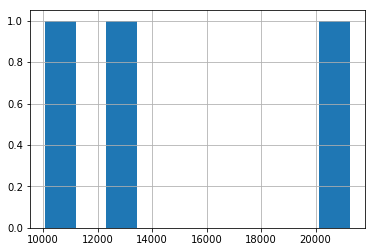

In [26]:
price.hist() # jejejeje todos los intervalos son iguales 

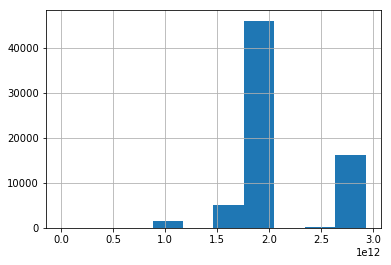

In [27]:
data_order['idBuyer'].hist()

In [28]:
# otra forma de hacerlo, mediante una función q retorne 

def count_unique(column):
    return len(column.unique())

data_order.apply(count_unique, axis=0).astype(np.int32)

idOrder             30106
idProduct            2339
productType             1
idBuyer             20548
price                 663
quantity               26
date                50463
active                  2
affiliationCost         1
idRecommendation        4
timestamp           50977
dtype: int32

In [29]:
# Algo q llama la atención es quantity >> tenemos 26 "cantidades diferentes", es decir encontramos, 
# carritos desde 1 prenda a 26 prendas.

In [30]:
idBuyer_sum = data_order.groupby('idBuyer').count()
idBuyer_sum[450:455]

,idOrder,idProduct,productType,price,quantity,date,active,affiliationCost,idRecommendation,timestamp
idBuyer,,,,,,,,,,
1000004910953,1,1,1,1,1,1,1,1,1,1
1000004911434,5,5,5,5,5,5,5,5,5,5
1000004911604,2,2,2,2,2,2,2,2,2,2
1000004913131,2,2,2,2,2,2,2,2,2,2
1000004915461,2,2,2,2,2,2,2,2,2,2


In [31]:
# tenemos un array de 20548 idBuyer diferentes.

array_Buyers= data_order['idBuyer'].unique()
array_Buyers

array([2000000018605, 2695454831000, 1802745861000, ..., 1926129461000,
       1926115931001, 1926134711000])

In [32]:
len(array_Buyers)

20548

In [33]:
type(array_Buyers)

numpy.ndarray

In [34]:
data

NameError: name 'data' is not defined

In [35]:
# tipos de recomendadores y el numero de vecess se ha utilizado.

idRecommendation_count = data_order.groupby('idRecommendation').size().sort_values(ascending=False)
print (idRecommendation_count)

idRecommendation
0     66826
7      1741
8       357
20      145
dtype: int64


In [36]:
# total de productos en el total de Orders >> LISTA ITEMS MAS AÑADIDOS A LA CESTA?

idBuyer_count = data_order.groupby('idProduct')['idOrder'].count()
idBuyer_count[500:510]

idProduct
885475514    16
887608521    28
889769339    98
890017006     4
890193819    74
891372226    44
894881243    42
896845920    10
897353286    10
899160006    35
Name: idOrder, dtype: int64

In [37]:
# cuantos id Product distientos hay en cada carrito.

idBuyer_count = data_order.groupby('idOrder')['idProduct'].count()
idBuyer_count.tail()

idOrder
477513    1
477514    5
477515    1
477516    3
477517    1
Name: idProduct, dtype: int64